In [20]:
import pyccl as ccl
print(f"I am using pyccl version {ccl.__version__}")
import numpy as np
import matplotlib.pyplot as plt
from scripts.presets import Presets
from scripts.data_vectors import DataVectors
from scripts.data_vector_metrics import DataVectorMetrics
from scripts.power_spectra_analysis import PowerSpectraAnalysis
import time
import seaborn as sns
import cmasher as cmr


I am using pyccl version 2.8.0


In [2]:
# Step 1: Initialize your Presets object
forecast_year = "1"  # or whatever forecast year you want to use
presets = Presets(forecast_year=forecast_year, should_save_data=False)

# Step 2: Create an instance of PowerSpectraAnalysis with the Presets object
analysis = PowerSpectraAnalysis(presets)


### Step 3: Generate and save the fiducial spectra

In [ ]:
%%time
#analysis.compute_fiducial_spectra()

### Step 4: Compute the ell sweep power spectra
This generates and saves spectra as a function of ell values.
Adjust num_ell_values as needed (we are doign the default setting)

In [ ]:
%%time
#analysis.compute_cls_ell_sweep(num_ell_values=50)  


In [ ]:
path = "data_output/spectra_sweep/spectra_y1/cls/ellscan/"
ell = np.load(f"{path}cl_cs_y1_ell22.npy")
ell

### Step 5: Compute the redshift sweep (z sweep) power spectra
This generates and saves spectra over a range of z_max and z_resolution values.
The values there are the default ones.

In [7]:
%%time
zet_max_range = np.arange(3, 4.1, 0.1)
zet_res_range = np.arange(300, 10050, 50).astype(int)
#analysis.compute_cls_zres_and_zmax(zet_max_range, zet_res_range)


CPU times: user 40 µs, sys: 55 µs, total: 95 µs
Wall time: 79.2 µs


### Step 6: Compute the ell sweep distance metric
This calculates and saves the delta metric using the ell sweep spectra compared to the fiducial spectra.

In [12]:
%%time
ell_sweep = analysis.compute_distance_metric_ell_sweep(num_ell_values=50)


Loaded fiducial spectra for chi-squared reference
Processed ell=20 with delta chi-squared: 0.0
Processed ell=21 with delta chi-squared: 101.3924729082235
Processed ell=24 with delta chi-squared: 2075.991200514426
Processed ell=26 with delta chi-squared: 5483.371257893322
Processed ell=29 with delta chi-squared: 15432.871912441426
Processed ell=31 with delta chi-squared: 26341.11752915529
Processed ell=35 with delta chi-squared: 60989.39767330157
Processed ell=38 with delta chi-squared: 99823.35188141445
Processed ell=42 with delta chi-squared: 168235.30381748156
Processed ell=46 with delta chi-squared: 254002.47632647346
Processed ell=51 with delta chi-squared: 379389.24891829025
Processed ell=56 with delta chi-squared: 520971.6102214888
Processed ell=61 with delta chi-squared: 674077.0309515857
Processed ell=67 with delta chi-squared: 861862.8341553765
Processed ell=74 with delta chi-squared: 1071103.4287407326
Processed ell=81 with delta chi-squared: 1262254.788376987
Processed ell=8

### Step 7: Compute the z sweep distance metric
This calculates and saves the delta metric using the z sweep spectra compared to the fiducial spectra.

In [14]:
%%time
z_sweep = analysis.compute_distance_metric_redshift_sweep(zet_max_range, zet_res_range)


Loaded fiducial spectra from:
data_output/spectra_sweep/spectra_y1/fiducial/cl_gc_fiducial_y1.npy
data_output/spectra_sweep/spectra_y1/fiducial/cl_ggl_fiducial_y1.npy
data_output/spectra_sweep/spectra_y1/fiducial/cl_cs_fiducial_y1.npy
Saved delta results for zres and zmax sweep: data_output/metric/zscan/delta_sweep_zres_zmax_y1.npy
CPU times: user 1min 23s, sys: 6.12 s, total: 1min 29s
Wall time: 13.9 s


<Axes: >

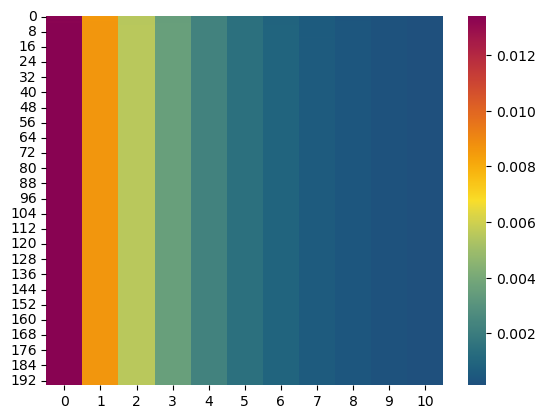

In [22]:
cmap = cmr.get_sub_cmap('cmr.pride', 0.15, 0.85)
sns.heatmap(z_sweep.T, cmap=cmap)

In [ ]:
# This analysis will be done for a cosmology with the following parameters
# if you want to change the cosmology, you can do it here or just run without it.
# For now, we will keep it as is.
#cosmo = ccl.Cosmology(Omega_c=0.27, Omega_b=0.045, h=0.67, sigma8=0.83, n_s=0.96)

# The class has default values for the maximal redshift and the resolution of redshifts.
# You can change them if you want to or run the default values.
# Since we are investigating the impact of the resolution of redshifts,
# we will keep the maximal redshift as is (for now) and only change the redshift resolution.
redshift_max = 3.5
redshift_resolution_1 = 300  # this is the first resolution of redshifts
redshift_resolution_2 = 5000  # this is the second resolution of redshifts
# Please note that the redshift resolution is the number of redshifts between 0 and redshift_max.
# Additionally, a lot of parametric sweeping is already coded into helper functions 
# so we will not need to worry about that for now.

# We will also investigate ell binning but for this particular exercise,
# we will keep the ell binning at default values.
#ell_min = 20
#ell_max = 2000
#n_ell = 50


niko


In [ ]:
%%time
start_time = time.time()
# This is the fiducial
forecast_year = "1"
presets = Presets(forecast_year=forecast_year, should_save_data=False)
data = DataVectors(presets)
cl_gc = np.array(data.galaxy_clustering_cls(include_all_correlations=True))
cl_ggl = np.array(data.galaxy_galaxy_lensing_cls(include_all_correlations=True))
cl_cs = np.array(data.cosmic_shear_cls(include_all_correlations=True))
single_iteration_time = time.time() - start_time

# Estimate total time
total_time_estimate = single_iteration_time * 2156
print(f"Estimated total runtime: {total_time_estimate / 60:.2f} minutes")

# Set up the range for z_max and z_resolution based on your new requirements
zet_max = np.arange(3, 4.1, 0.1)  # Range from 3 to 4, in increments of 0.1
zet_res = np.arange(300, 10050, 50).astype(int)  # Range from 300 to 10000 in increments of 50, cast to int

# Initialize chi2 array to match the new grid dimensions
chi2 = np.zeros((len(zet_max), len(zet_res)))

# Loop over the parameter grid
for i_max, val_max in enumerate(zet_max):
    for i_res, val_res in enumerate(zet_res):
        presets_1 = Presets(redshift_max=val_max,
                            redshift_resolution=val_res,
                            forecast_year=forecast_year,
                            should_save_data=False)

        data_1 = DataVectors(presets_1)
        cl_gc_1 = np.array(data_1.galaxy_clustering_cls(include_all_correlations=True))
        cl_ggl_1 = np.array(data_1.galaxy_galaxy_lensing_cls(include_all_correlations=True))
        cl_cs_1 = np.array(data_1.cosmic_shear_cls(include_all_correlations=True))

        metric = DataVectorMetrics(presets)
        chi2[i_max, i_res] = metric.get_delta_chi2(cl_gc, cl_ggl, cl_cs, cl_gc_1, cl_ggl_1, cl_cs_1)

# Save the result
fname = "./data_output/chi2/chi2_sweep_zres_zmax_y" + forecast_year
np.savez(fname, zet_res=zet_res, zet_max=zet_max, chi2=chi2)


In [ ]:
# This is the fiducial setup
forecast_year = "1"
presets = Presets(forecast_year=forecast_year, should_save_data=False)
data = DataVectors(presets)
cl_gc = data.galaxy_clustering_cls(include_all_correlations=True)
cl_ggl = data.galaxy_galaxy_lensing_cls(include_all_correlations=True)
cl_cs = data.cosmic_shear_cls(include_all_correlations=True)

# Calculate fiducial chi-squared difference with a zero baseline
metric = DataVectorMetrics(presets)
zero_gc = np.zeros_like(cl_gc)
zero_ggl = np.zeros_like(cl_ggl)
zero_cs = np.zeros_like(cl_cs)
chi2_fid = metric.get_delta_chi2(cl_gc, cl_ggl, cl_cs, zero_gc, zero_ggl, zero_cs)

# Define the range of ell modes and initialize the chi-squared storage array
N = 50
number_ell = np.geomspace(20., presets.ell_max, N).astype(int)
chi2_y1 = np.zeros(N)

# Sweep over different ell modes and calculate chi-squared differences
for i_ell, val_ell in enumerate(number_ell):
    presets_1 = Presets(ell_num=val_ell, should_save_data=False)
    data_1 = DataVectors(presets_1)

    # Get power spectra for the current ell setting
    cl_gc_1 = data_1.galaxy_clustering_cls(include_all_correlations=True)
    cl_ggl_1 = data_1.galaxy_galaxy_lensing_cls(include_all_correlations=True)
    cl_cs_1 = data_1.cosmic_shear_cls(include_all_correlations=True)

    # Calculate chi-squared difference and normalize
    chi2_y1[i_ell] = abs((metric.get_delta_chi2(cl_gc_1, cl_ggl_1, cl_cs_1, zero_gc, zero_ggl, zero_cs) - chi2_fid) / chi2_fid)

# Save the result
file = "./data_output/chi2/chi2_number_ell_y" + forecast_year
np.savez(file, number_ell=number_ell, chi2_y1=chi2_y1)


In [ ]:
# This is the fiducial setup
forecast_year = "10"
presets = Presets(forecast_year=forecast_year, should_save_data=False)
data = DataVectors(presets)
cl_gc = data.galaxy_clustering_cls(include_all_correlations=True)
cl_ggl = data.galaxy_galaxy_lensing_cls(include_all_correlations=True)
cl_cs = data.cosmic_shear_cls(include_all_correlations=True)

# Calculate fiducial chi-squared difference with a zero baseline
metric = DataVectorMetrics(presets)
zero_gc = np.zeros_like(cl_gc)
zero_ggl = np.zeros_like(cl_ggl)
zero_cs = np.zeros_like(cl_cs)
chi2_fid = metric.get_delta_chi2(cl_gc, cl_ggl, cl_cs, zero_gc, zero_ggl, zero_cs)

# Define the range of ell modes and initialize the chi-squared storage array
N = 50
number_ell = np.geomspace(20., presets.ell_max, N).astype(int)
chi2_y1 = np.zeros(N)

# Sweep over different ell modes and calculate chi-squared differences
for i_ell, val_ell in enumerate(number_ell):
    presets_1 = Presets(ell_num=val_ell, should_save_data=False)
    data_1 = DataVectors(presets_1)

    # Get power spectra for the current ell setting
    cl_gc_1 = data_1.galaxy_clustering_cls(include_all_correlations=True)
    cl_ggl_1 = data_1.galaxy_galaxy_lensing_cls(include_all_correlations=True)
    cl_cs_1 = data_1.cosmic_shear_cls(include_all_correlations=True)

    # Calculate chi-squared difference and normalize
    chi2_y1[i_ell] = abs((metric.get_delta_chi2(cl_gc_1, cl_ggl_1, cl_cs_1, zero_gc, zero_ggl, zero_cs) - chi2_fid) / chi2_fid)

# Save the result
file = "./data_output/chi2/chi2_number_ell_y" + forecast_year
np.savez(file, number_ell=number_ell, chi2_y1=chi2_y1)


In [ ]:
from matplotlib import cm, ticker

fontsi = 20
fontsi2 = 20


fig = plt.figure()
ax = fig.add_subplot()
plt.rc('text', usetex=True)


CS = plt.contourf(zet_max,zet_res,chi2.T,cmap = "cividis")#,  locator=ticker.LogLocator())
cb = plt.colorbar(CS)
plt.xlabel(r"$z_\mathrm{max}$", fontsize = fontsi)
plt.ylabel(r"$N_z$", fontsize = fontsi)
cb.set_label(r'$\Delta\chi^2$', fontsize=fontsi)
plt.tick_params(labelsize=fontsi2)

#plt.xscale("log")
#plt.yscale("log")

for t in cb.ax.get_yticklabels():
    t.set_fontsize(fontsi2)
plt.tight_layout()
fname = "./plots_output/chi2_zet_params_y" + forecast_year + ".pdf"
plt.savefig(fname)


In [ ]:
forecast_year = "10"
presets = Presets(forecast_year=forecast_year, should_save_data=False)
data = DataVectors(presets)
cl_gc = np.array(data.galaxy_clustering_cls(include_all_correlations=True))
cl_ggl = np.array(data.galaxy_galaxy_lensing_cls(include_all_correlations=True))
cl_cs = np.array(data.cosmic_shear_cls(include_all_correlations=True))


N = 25
zet_max = np.linspace(3.,5,N)
zet_res = np.geomspace(500,10000,N).astype(int)
chi2 = np.zeros((N,N))

for i_max, val_max in enumerate(zet_max):
    for i_res, val_res in enumerate(zet_res):
        presets_1 = Presets(redshift_max=val_max,
                        redshift_resolution=val_res,
                        forecast_year=forecast_year,should_save_data=False)

        data_1 = DataVectors(presets_1)
        cl_gc_1 = np.array(data_1.galaxy_clustering_cls(include_all_correlations=True))
        cl_ggl_1 = np.array(data_1.galaxy_galaxy_lensing_cls(include_all_correlations=True))
        cl_cs_1 = np.array(data_1.cosmic_shear_cls(include_all_correlations=True))

        metric = DataVectorMetrics(presets)
        chi2[i_max,i_res] = metric.get_delta_chi2(cl_gc, cl_ggl, cl_cs,cl_gc_1, cl_ggl_1, cl_cs_1)

file = "./data_output/chi2/chi2_sweep_zmax_zres_y" + forecast_year 
np.savez(file, zet_res=zet_res, zet_max=zet_max, chi2=chi2)

In [ ]:
fontsi = 20
fontsi2 = 20

fig = plt.figure()
ax = fig.add_subplot()
plt.rc('text', usetex=True)

CS = plt.contourf(zet_max,zet_res,chi2.T,cmap = "cividis")#,  locator=ticker.LogLocator())
cb = plt.colorbar(CS)
plt.xlabel(r"$z_\mathrm{max}$", fontsize = fontsi)
plt.ylabel(r"$N_z$", fontsize = fontsi)
cb.set_label(r'$\Delta\chi^2$', fontsize=fontsi)
plt.tick_params(labelsize=fontsi2)

plt.xscale("linear")
plt.yscale("log")

for t in cb.ax.get_yticklabels():
    t.set_fontsize(fontsi2)
plt.tight_layout()
fname = "./plots_output/chi2_zet_params_y" + forecast_year + ".pdf"
plt.savefig("./plots_output/chi2_zet_params.pdf")

In [ ]:
forecast_year = "1"
presets = Presets(forecast_year=forecast_year, should_save_data=False)
data = DataVectors(presets)
cl_gc = np.array(data.galaxy_clustering_cls(include_all_correlations=True))
cl_ggl = np.array(data.galaxy_galaxy_lensing_cls(include_all_correlations=True))
cl_cs = np.array(data.cosmic_shear_cls(include_all_correlations=True))

metric = DataVectorMetrics(presets)
chi2_fid = metric.get_delta_chi2(cl_gc, 
                                 cl_ggl,
                                 cl_cs,
                                 np.zeros_like(cl_gc),
                                 np.zeros_like(cl_ggl),
                                 np.zeros_like(cl_cs))


N = 50
number_ell = np.geomspace(20.,presets.ell_max,N).astype(int)
chi2_y1 = np.zeros(N)

for i_ell, val_ell in enumerate(number_ell):
    presets_1 = Presets(ell_num=val_ell,should_save_data=False)

    data_1 = DataVectors(presets_1)
    cl_gc_1 = np.array(data_1.galaxy_clustering_cls(include_all_correlations=True))
    cl_ggl_1 = np.array(data_1.galaxy_galaxy_lensing_cls(include_all_correlations=True))
    cl_cs_1 = np.array(data_1.cosmic_shear_cls(include_all_correlations=True))

    metric = DataVectorMetrics(presets_1)
    chi2_y1[i_ell] = np.abs((metric.get_delta_chi2(cl_gc_1, 
                                 cl_ggl_1,
                                 cl_cs_1,
                                 np.zeros_like(cl_gc_1),
                                 np.zeros_like(cl_ggl_1),
                                 np.zeros_like(cl_cs_1)) - chi2_fid)/chi2_fid)

file = "./data_output/chi2/chi2_number_ell_y" + forecast_year 
np.savez(file, zet_res=zet_res, zet_max=zet_max, chi2=chi2)

In [ ]:
forecast_year = "10"
presets = Presets(forecast_year=forecast_year, should_save_data=False)
data = DataVectors(presets)
cl_gc = np.array(data.galaxy_clustering_cls(include_all_correlations=True))
cl_ggl = np.array(data.galaxy_galaxy_lensing_cls(include_all_correlations=True))
cl_cs = np.array(data.cosmic_shear_cls(include_all_correlations=True))

metric = DataVectorMetrics(presets)
chi2_fid = metric.get_delta_chi2(cl_gc, 
                                 cl_ggl,
                                 cl_cs,
                                 np.zeros_like(cl_gc),
                                 np.zeros_like(cl_ggl),
                                 np.zeros_like(cl_cs))


N = 50
number_ell = np.geomspace(20.,presets.ell_max,N).astype(int)
chi2_y10 = np.zeros(N)

for i_ell, val_ell in enumerate(number_ell):
    presets_1 = Presets(forecast_year=forecast_year,ell_num=val_ell,should_save_data=False)

    data_1 = DataVectors(presets_1)
    cl_gc_1 = np.array(data_1.galaxy_clustering_cls(include_all_correlations=True))
    cl_ggl_1 = np.array(data_1.galaxy_galaxy_lensing_cls(include_all_correlations=True))
    cl_cs_1 = np.array(data_1.cosmic_shear_cls(include_all_correlations=True))

    metric = DataVectorMetrics(presets_1)
    chi2_y10[i_ell] = np.abs((metric.get_delta_chi2(cl_gc_1, 
                                 cl_ggl_1,
                                 cl_cs_1,
                                 np.zeros_like(cl_gc_1),
                                 np.zeros_like(cl_ggl_1),
                                 np.zeros_like(cl_cs_1)) - chi2_fid)/chi2_fid)

file = "./data_output/chi2/chi2_number_ell_y" + forecast_year 
np.savez(file, zet_res=zet_res, zet_max=zet_max, chi2=chi2)

In [ ]:
fontsi = 20
fontsi2 = 20
fig = plt.figure()
ax = fig.add_subplot()

plt.rc('text', usetex=True)

plt.loglog(number_ell, chi2_y1, color = "blue", lw = 2, label = r"$\mathrm{Year\; 1}$")
plt.loglog(number_ell, chi2_y10, color = "red", lw = 2, label = r"$\mathrm{Year\; 10}$")

plt.xlabel("$\ell$", fontsize = fontsi)
plt.ylabel(r"$\mathrm{relative\;difference\;}\Delta\chi^2$", fontsize = fontsi)
plt.tick_params(labelsize=fontsi2)
plt.xlim(number_ell[0],number_ell[-1])
ax.legend( frameon = False, fontsize =fontsi, loc = "best")
plt.tight_layout()
plt.savefig("./plots_output/chi2_ell_num.pdf")

